In [239]:
import pandas as pd
import pickle
import spacy
from matplotlib import pyplot as plt

In [240]:
evaluation_annotation = pd.read_csv("annotations/evaluation_annotation_speech.csv", delimiter=';', header=0)
nothing_annotation = pd.read_csv("annotations/nothing_annotation_speech.csv", delimiter=';', header=0)
class_annotation = pd.read_csv("annotations/class_annotation_speech.csv", delimiter=';', header=0)

In [241]:
evaluation_annotation = evaluation_annotation[evaluation_annotation['true_label'] != "vocative"]
nothing_annotation = nothing_annotation[nothing_annotation['true_label'] != "vocative"]
class_annotation = class_annotation[class_annotation['true_label'] != "vocative"]

In [242]:
evaluation_annotation

,utterance_token_list,Sentences,predicted_labels,confidences,next_verbal_interjection,next_nonverbal_interjection,Speaker,Gender,Party,Filename,true_label,utterance
0,"['Das', 'machen', 'Sie', 'aber', 'nicht', ',',...","Das machen Sie aber nicht, und deswegen wenden...",['Evaluation'],[0.9255906939506531],False,False,Mario Mieruch,männlich,LKR,BT_19_239.xml,"['Accusation', 'Evaluation']",False
1,"['Deshalb', 'würde', 'ein', 'Sondergipfel', 'z...",Deshalb würde ein Sondergipfel zu diesem Zeitp...,['Evaluation'],[0.9712060689926147],False,False,Nils Schmid,männlich,SPD,BT_19_239.xml,['Evaluation'],False
2,"['Es', 'ist', 'gut', 'und', 'es', 'ist', 'uns'...","Es ist gut und es ist uns eine Ehre, Sie heute...",['Evaluation'],[0.9304444193840027],False,False,Alexander Throm,männlich,CDU/CSU,BT_19_236.xml,['Expressive'],False
3,"['Da', 'ist', 'eine', 'Region', 'gewissermaßen...",Da ist eine Region gewissermaßen umzingelt von...,['Evaluation'],[0.8300830721855164],False,False,Marie-Agnes Strack-Zimmermann,weiblich,FDP,BT_19_236.xml,"['Report', 'Request']",False
4,"['Beim', 'Infektionsschutz', 'geht', 'es', 'ni...",Beim Infektionsschutz geht es nicht um Wählers...,['Evaluation'],[0.9717352986335754],False,True,Janosch Dahmen,männlich,GRUENE,BT_19_238.xml,['Evaluation'],False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"['aber', 'sie', 'sind', 'die', 'nicht', 'wegzu...",aber sie sind die nicht wegzudenkende Basis ei...,['Evaluation'],[0.9666141271591187],False,False,Martin Patzelt,männlich,CDU/CSU,BT_19_237.xml,['Evaluation'],True
96,"['Was', 'lauert', 'denn', 'hinter', 'diesem', ...",Was lauert denn hinter diesem Damm?,['Evaluation'],[0.5899555683135986],False,False,Roman Johannes Reusch,männlich,AfD,BT_19_236.xml,['Question-All'],True
97,"['Kurz', ':', 'Wie', 'würde', 'es', 'Ihnen', '...","Kurz: Wie würde es Ihnen gehen, wenn Sie Ihre ...",['Evaluation'],[0.5557129383087158],False,False,Susann Rüthrich,weiblich,SPD,BT_19_236.xml,['Question-All'],True
98,"['Befreien', 'und', 'entfesseln', 'wir', 'unse...",Befreien und entfesseln wir unsere Wirtschaft?,['Evaluation'],[0.8563922047615051],False,False,Paul Ziemiak,männlich,CDU/CSU,BT_19_239.xml,['Question-All'],True


In [243]:
evaluation_annotation = evaluation_annotation[evaluation_annotation['true_label'] != "vocative"]

True Label Distribution:
true_label
['Evaluation']                   39.583333
['Report']                       19.791667
['Accusation']                    7.291667
['Expressive']                    6.250000
['Question-All']                  5.208333
['Self-representation']           4.166667
['Demand']                        4.166667
['Request']                       4.166667
['Bad-outcome']                   3.125000
['Support']                       2.083333
['Accusation', 'Evaluation']      1.041667
['Report', 'Request']             1.041667
['Accusation', 'Bad-Outcome']     1.041667
['Macro']                         1.041667
Name: proportion, dtype: float64


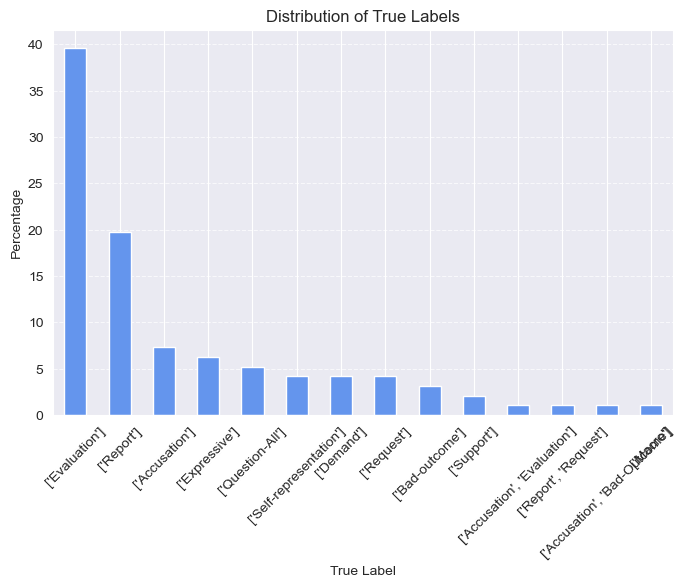


Utterance Distribution:
utterance
True           84.375000
Interrupted     8.333333
False           7.291667
Name: proportion, dtype: float64


In [244]:
true_label_distribution = evaluation_annotation['true_label'].value_counts(normalize=True) * 100
utterance_distribution = evaluation_annotation['utterance'].value_counts(normalize=True) * 100

print("True Label Distribution:")
print(true_label_distribution)
import matplotlib.pyplot as plt

true_label_distribution.plot(kind="bar", figsize=(8, 5), color="cornflowerblue")

plt.xlabel("True Label")
plt.ylabel("Percentage")
plt.title("Distribution of True Labels")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid
plt.show()

print("\nUtterance Distribution:")
print(utterance_distribution)


In [245]:
evaluation_distribution = evaluation_annotation[evaluation_annotation["true_label"] == "['Evaluation']"]["utterance"].value_counts(normalize=True) * 100
evaluation_distribution

utterance
True           86.842105
False          10.526316
Interrupted     2.631579
Name: proportion, dtype: float64

In [246]:
evaluation_distribution = evaluation_annotation[evaluation_annotation["true_label"] != "['Evaluation']"]["utterance"].value_counts(normalize=True) * 100
evaluation_distribution

utterance
True           82.758621
Interrupted    12.068966
False           5.172414
Name: proportion, dtype: float64

In [247]:
from sklearn.metrics import accuracy_score
true_labels = evaluation_annotation['true_label']
predicted_labels = evaluation_annotation['predicted_labels']

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 39.58%


In [248]:
verbal_distribution = (
        evaluation_annotation[evaluation_annotation["next_verbal_interjection"] == True]["true_label"]
        .value_counts(normalize=True) * 100
    )

verbal_distribution

true_label
['Report']                 50.000000
['Self-representation']    33.333333
['Accusation']             16.666667
Name: proportion, dtype: float64

In [249]:
nonverbal_distribution = (
        evaluation_annotation[evaluation_annotation["next_nonverbal_interjection"] == True]["true_label"]
        .value_counts(normalize=True) * 100
    )

verbal_distribution

true_label
['Report']                 50.000000
['Self-representation']    33.333333
['Accusation']             16.666667
Name: proportion, dtype: float64

In [250]:
no_interjection_distribution = (
    evaluation_annotation[
        (evaluation_annotation["next_verbal_interjection"] == False) &
        (evaluation_annotation["next_nonverbal_interjection"] == False)
    ]["true_label"]
    .value_counts(normalize=True) * 100
)

no_interjection_distribution

true_label
['Evaluation']                   41.860465
['Report']                       18.604651
['Expressive']                    6.976744
['Accusation']                    6.976744
['Question-All']                  5.813953
['Request']                       4.651163
['Bad-outcome']                   3.488372
['Demand']                        3.488372
['Self-representation']           2.325581
['Support']                       2.325581
['Accusation', 'Evaluation']      1.162791
['Report', 'Request']             1.162791
['Accusation', 'Bad-Outcome']     1.162791
Name: proportion, dtype: float64

In [251]:
nothing_annotation

,utterance_token_list,Sentences,predicted_labels,confidences,next_verbal_interjection,next_nonverbal_interjection,Speaker,Gender,Party,Filename,true_label,utterance
0,['2019.'],2019.,[],[],False,False,Alexander Throm,männlich,CDU/CSU,BT_19_236.xml,[],Interrupted
1,"['angefangen', 'bei', 'einer', 'Düngeverordnun...","angefangen bei einer Düngeverordnung, die zust...",[],[],False,False,Gero Clemens Hocker,männlich,FDP,BT_19_236.xml,"['Accusation', 'Question-All']",False
2,"['Das', 'Modell', 'der', 'dualen', 'Ausbildung...",Das Modell der dualen Ausbildung hat sich bewä...,[],[],False,False,Axel Knoerig,männlich,CDU/CSU,BT_19_235.xml,"['Evaluation', 'Demand']",False
3,"['Deshalb', 'greift', 'die', 'vorgeschlagene',...",Deshalb greift die vorgeschlagene Änderung aus...,[],[],False,False,Wolfgang Wiehle,männlich,AfD,BT_19_236.xml,['Rejection'],False
4,"['Geboren', 'wurden', 'sie', 'in', 'einem', 'L...","Geboren wurden sie in einem Lebensborn-Heim, a...",[],[],True,False,Simone Barrientos,weiblich,DIE LINKE,BT_19_237.xml,"['Report', 'Accusation']",False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"['Darüber', 'hinaus', 'geht', 'die', 'Bundesre...",Darüber hinaus geht die Bundesregierung davon ...,[],[],False,False,Andreas Bleck,männlich,AfD,BT_19_236.xml,['Report'],True
96,"['Ich', 'möchte', 'das', 'auch', 'begründen', ...",Ich möchte das auch begründen.,[],[],False,True,Jan Korte,männlich,DIE LINKE,BT_19_238.xml,['Macro'],True
97,"['Ich', 'frage', 'mich', ':']",Ich frage mich:,[],[],False,False,Gesine Lötzsch,weiblich,DIE LINKE,BT_19_238.xml,['Question-All'],Interrupted
98,"['Schrumpfende', 'Räume', 'gibt', 'es', 'zum',...",Schrumpfende Räume gibt es zum Teil auch für d...,[],[],False,False,Linda Teuteberg,weiblich,FDP,BT_19_237.xml,['Report'],True


True Label Distribution:
true_label
['Expressive']                    25.609756
['Report']                        19.512195
['Demand']                        10.975610
[]                                 7.317073
['Promise']                        6.097561
['Question-All']                   4.878049
['Self-Representation']            4.878049
['Accusation']                     3.658537
['Rhetorical Question']            2.439024
['Evaluation']                     2.439024
['Rejection']                      2.439024
['Expressive', 'Evaluation']       1.219512
['Accusation', 'Question-All']     1.219512
['Report', 'Demand']               1.219512
['Question-All"]                   1.219512
['Report', 'Accusation']           1.219512
['Request']                        1.219512
['Evaluation', 'Demand']           1.219512
['Macro']                          1.219512
Name: proportion, dtype: float64


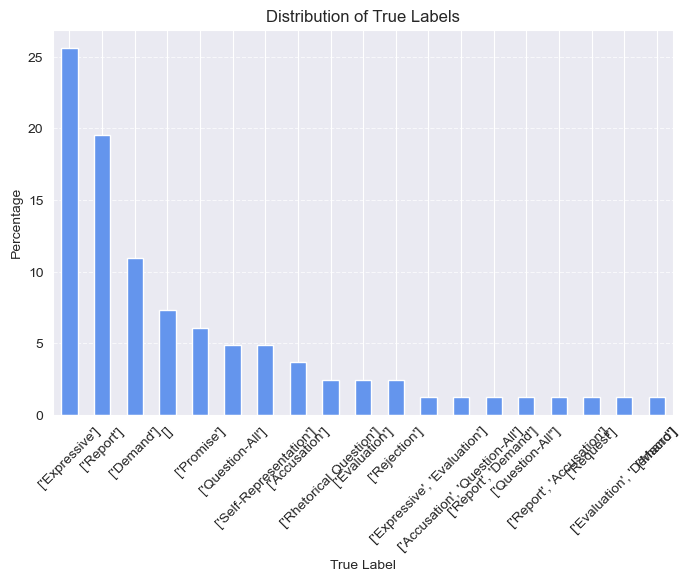


Utterance Distribution:
utterance
True           80.487805
Interrupted    12.195122
False           7.317073
Name: proportion, dtype: float64


In [252]:
true_label_distribution = nothing_annotation['true_label'].value_counts(normalize=True) * 100
utterance_distribution = nothing_annotation['utterance'].value_counts(normalize=True) * 100

print("True Label Distribution:")
print(true_label_distribution)

true_label_distribution.plot(kind="bar", figsize=(8, 5), color="cornflowerblue")

plt.xlabel("True Label")
plt.ylabel("Percentage")
plt.title("Distribution of True Labels")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid
plt.show()

print("\nUtterance Distribution:")
print(utterance_distribution)

In [253]:
evaluation_distribution = nothing_annotation[nothing_annotation["true_label"] == "[]"]["utterance"].value_counts(normalize=True) * 100
evaluation_distribution

utterance
Interrupted    100.0
Name: proportion, dtype: float64

In [254]:
evaluation_distribution = nothing_annotation[nothing_annotation["true_label"] != "[]"]["utterance"].value_counts(normalize=True) * 100
evaluation_distribution

utterance
True           86.842105
False           7.894737
Interrupted     5.263158
Name: proportion, dtype: float64

In [255]:
from sklearn.metrics import accuracy_score
true_labels = nothing_annotation['true_label']
predicted_labels = nothing_annotation['predicted_labels']

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 7.32%


In [256]:
class_annotation

,utterance_token_list,Sentences,predicted_labels,confidences,next_verbal_interjection,next_nonverbal_interjection,Speaker,Gender,Party,Filename,true_label,utterance
0,"['Er', 'hat', ',', 'um', 'das', 'Angebot', 'de...","Er hat, um das Angebot des Betreibers auf 2 Mi...","['Accusation', 'Evaluation']","[0.7817721366882324, 0.8461074829101562]",False,False,Oliver Krischer,männlich,GRUENE,BT_19_235.xml,['Accusation'],False
1,"['Selbst', 'wenn', 'die', 'Delta-Variante', 'i...",Selbst wenn die Delta-Variante im Indischen Oz...,"['Accusation', 'Evaluation']","[0.5181182622909546, 0.8843364715576172]",False,False,Wieland Schinnenburg,männlich,FDP,BT_19_236.xml,['Accusation'],True
2,"['Jetzt', 'kommen', 'Sie', 'in', 'Ihrem', 'Ant...",Jetzt kommen Sie in Ihrem Antrag mit einer Mog...,"['Accusation', 'Evaluation']","[0.5760517120361328, 0.8261353373527527]",False,False,Armin-Paulus Hampel,männlich,AfD,BT_19_238.xml,['Accusation'],True
3,"['Sie', 'wollen', 'eine', '„', 'Mission', 'Qua...",Sie wollen eine „Mission Quantencomputer“ zum ...,"['Accusation', 'Evaluation']","[0.727050244808197, 0.5267686247825623]",False,True,Anna Christmann,weiblich,GRUENE,BT_19_237.xml,['Accusation'],True
4,"['Aber', 'diesem', 'Green', 'Deal', 'fehlt', '...",Aber diesem Green Deal fehlt der pulsierende H...,"['Accusation', 'Evaluation']","[0.6021878719329834, 0.8785416483879089]",False,False,Annalena Baerbock,weiblich,GRUENE,BT_19_236.xml,['Accusation'],True
...,...,...,...,...,...,...,...,...,...,...,...,...
106,"['Wir', 'sind', 'nach', 'Afghanistan', 'gegang...","Wir sind nach Afghanistan gegangen, um die fri...",['Self-representation'],[0.5320760607719421],False,False,Fritz Felgentreu,männlich,SPD,BT_19_235.xml,['Self-representation'],True
107,"['Das', 'zeigt', ',', 'dass', 'wir', 'die', 'C...","Das zeigt, dass wir die Coronaschutzmaßnahmen ...",['Self-representation'],[0.5861029028892517],False,False,Johannes Fechner,männlich,SPD,BT_19_239.xml,['Self-representation'],True
108,"['Die', 'Linke', 'hat', 'in', 'ihrem', 'Antrag...",Die Linke hat in ihrem Antrag auf Einführung e...,['Support'],[0.6866222023963928],False,False,Volker Münz,männlich,AfD,BT_19_237.xml,['Support'],True
109,"['So', 'oder', 'so', ':', 'Die', 'AfD', 'Frakt...","So oder so: Die AfD Fraktion begrüßt es, dass ...",['Support'],[0.5960627198219299],False,False,Thomas Seitz,männlich,AfD,BT_19_236.xml,['Support'],True


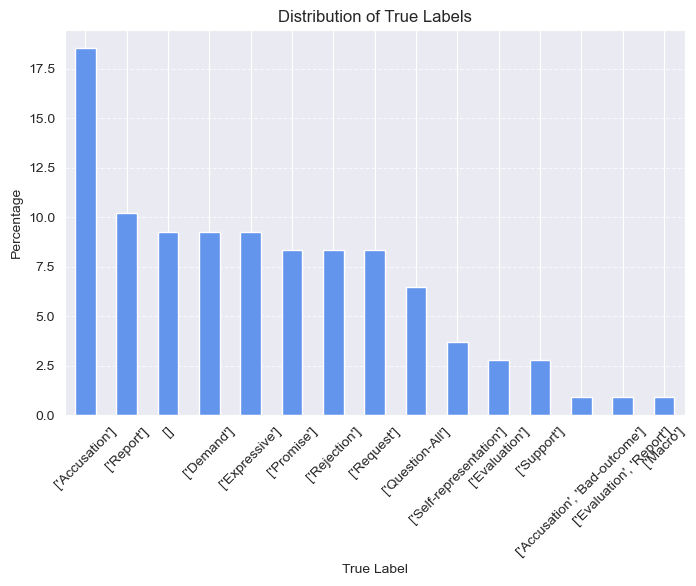

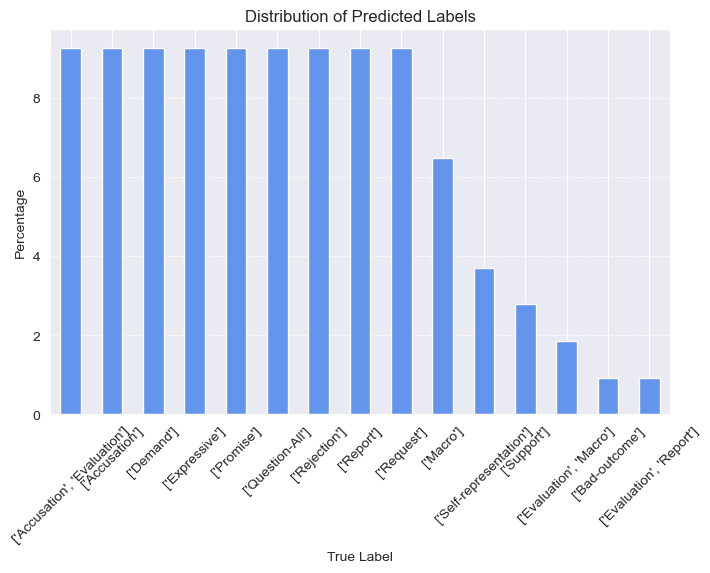

True Label Distribution:
true_label
['Accusation']                   18.518519
['Report']                       10.185185
[]                                9.259259
['Demand']                        9.259259
['Expressive']                    9.259259
['Promise']                       8.333333
['Rejection']                     8.333333
['Request']                       8.333333
['Question-All']                  6.481481
['Self-representation']           3.703704
['Evaluation']                    2.777778
['Support']                       2.777778
['Accusation', 'Bad-outcome']     0.925926
['Evaluation', 'Report']          0.925926
['Macro']                         0.925926
Name: proportion, dtype: float64

Utterance Distribution:
utterance
True           70.370370
False          18.518519
Interrupted    11.111111
Name: proportion, dtype: float64


In [257]:
true_label_distribution = class_annotation['true_label'].value_counts(normalize=True) * 100
predicted_label_distribution = class_annotation['predicted_labels'].value_counts(normalize=True) * 100
utterance_distribution = class_annotation['utterance'].value_counts(normalize=True) * 100

true_label_distribution.plot(kind="bar", figsize=(8, 5), color="cornflowerblue")

plt.xlabel("True Label")
plt.ylabel("Percentage")
plt.title("Distribution of True Labels")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid
plt.show()


predicted_label_distribution.plot(kind="bar", figsize=(8, 5), color="cornflowerblue")

plt.xlabel("True Label")
plt.ylabel("Percentage")
plt.title("Distribution of Predicted Labels")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid
plt.show()


print("True Label Distribution:")
print(true_label_distribution)

print("\nUtterance Distribution:")
print(utterance_distribution)

In [266]:
predicted_label_distribution

predicted_labels
['Accusation', 'Evaluation']    9.259259
['Accusation']                  9.259259
['Demand']                      9.259259
['Expressive']                  9.259259
['Promise']                     9.259259
['Question-All']                9.259259
['Rejection']                   9.259259
['Report']                      9.259259
['Request']                     9.259259
['Macro']                       6.481481
['Self-representation']         3.703704
['Support']                     2.777778
['Evaluation', 'Macro']         1.851852
['Bad-outcome']                 0.925926
['Evaluation', 'Report']        0.925926
Name: proportion, dtype: float64

In [258]:
from sklearn.metrics import accuracy_score
true_labels = class_annotation['true_label']
predicted_labels = class_annotation['predicted_labels']
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.07%


In [267]:
from sklearn.metrics import precision_score, recall_score

for label in true_labels.unique():
    label_true = (true_labels == label)
    label_pred = (predicted_labels == label)

    precision = precision_score(label_true, label_pred, zero_division=0)
    recall = recall_score(label_true, label_pred, zero_division=0)

    evaluation_distribution = (
        class_annotation[class_annotation["true_label"] == label]["utterance"]
        .value_counts(normalize=True) * 100
    )

    print(f"Label: {label}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")
    print("Utterance Distribution:")
    print(evaluation_distribution, "\n")
    print("------ \n")


Label: ['Accusation']
Precision: 0.90, Recall: 0.45
Utterance Distribution:
utterance
True     75.0
False    25.0
Name: proportion, dtype: float64 

------ 

Label: []
Precision: 0.00, Recall: 0.00
Utterance Distribution:
utterance
Interrupted    100.0
Name: proportion, dtype: float64 

------ 

Label: ['Accusation', 'Bad-outcome']
Precision: 0.00, Recall: 0.00
Utterance Distribution:
utterance
True    100.0
Name: proportion, dtype: float64 

------ 

Label: ['Demand']
Precision: 1.00, Recall: 1.00
Utterance Distribution:
utterance
True     90.0
False    10.0
Name: proportion, dtype: float64 

------ 

Label: ['Evaluation']
Precision: 0.00, Recall: 0.00
Utterance Distribution:
utterance
Interrupted    66.666667
True           33.333333
Name: proportion, dtype: float64 

------ 

Label: ['Evaluation', 'Report']
Precision: 1.00, Recall: 1.00
Utterance Distribution:
utterance
False    100.0
Name: proportion, dtype: float64 

------ 

Label: ['Expressive']
Precision: 1.00, Recall: 1.00
Utt

In [260]:
label_distribution = class_annotation["true_label"].value_counts(normalize=True) * 100
label_distribution

true_label
['Accusation']                   18.518519
['Report']                       10.185185
[]                                9.259259
['Demand']                        9.259259
['Expressive']                    9.259259
['Promise']                       8.333333
['Rejection']                     8.333333
['Request']                       8.333333
['Question-All']                  6.481481
['Self-representation']           3.703704
['Evaluation']                    2.777778
['Support']                       2.777778
['Accusation', 'Bad-outcome']     0.925926
['Evaluation', 'Report']          0.925926
['Macro']                         0.925926
Name: proportion, dtype: float64

In [261]:
verbal_distribution = (
        class_annotation[class_annotation["next_verbal_interjection"] == True]["true_label"]
        .value_counts(normalize=True) * 100
    )

verbal_distribution

true_label
['Accusation']      33.333333
['Demand']          16.666667
['Promise']         16.666667
['Question-All']    16.666667
['Rejection']       16.666667
Name: proportion, dtype: float64

In [262]:
verbal_distribution = (
        class_annotation[class_annotation["next_nonverbal_interjection"] == True]["true_label"]
        .value_counts(normalize=True) * 100
    )

verbal_distribution

true_label
['Accusation']                   38.461538
['Demand']                       15.384615
['Accusation', 'Bad-outcome']     7.692308
['Promise']                       7.692308
['Question-All']                  7.692308
['Evaluation']                    7.692308
['Rejection']                     7.692308
['Request']                       7.692308
Name: proportion, dtype: float64

In [263]:
no_interjection_distribution = (
    class_annotation[
        (class_annotation["next_verbal_interjection"] == False) &
        (class_annotation["next_nonverbal_interjection"] == False)
    ]["true_label"]
    .value_counts(normalize=True) * 100
)

no_interjection_distribution

true_label
['Accusation']              14.285714
['Report']                  12.087912
[]                          10.989011
['Expressive']              10.989011
['Demand']                   8.791209
['Rejection']                8.791209
['Request']                  8.791209
['Promise']                  7.692308
['Question-All']             5.494505
['Self-representation']      4.395604
['Support']                  3.296703
['Evaluation']               2.197802
['Evaluation', 'Report']     1.098901
['Macro']                    1.098901
Name: proportion, dtype: float64

In [264]:
either_interjection_distribution = (
    class_annotation[
        (class_annotation["next_verbal_interjection"] == True) |
        (class_annotation["next_nonverbal_interjection"] == True)
    ]["true_label"]
    .value_counts(normalize=True) * 100
)

either_interjection_distribution

true_label
['Accusation']                   41.176471
['Demand']                       11.764706
['Promise']                      11.764706
['Question-All']                 11.764706
['Accusation', 'Bad-outcome']     5.882353
['Evaluation']                    5.882353
['Rejection']                     5.882353
['Request']                       5.882353
Name: proportion, dtype: float64

In [265]:
both_interjection_distribution = (
    class_annotation[
        (class_annotation["next_verbal_interjection"] == True) &
        (class_annotation["next_nonverbal_interjection"] == True)
    ]["true_label"]
    .value_counts(normalize=True) * 100
)

both_interjection_distribution

true_label
['Demand']       50.0
['Rejection']    50.0
Name: proportion, dtype: float64